In [1]:
import scipy.io
import pandas as pd
from matplotlib import pyplot as plt
import math
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,accuracy_score,f1_score,confusion_matrix

In [17]:
file=r'creditcard.csv'
bd=pd.read_csv(file)

## Data Exploration

Let's look at the first few entries of the data.

In [18]:
 bd.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


There are 31 columns which we can convert into features for training our Logistic model. Henceforth, we'll use the term 'features' to refer to the independent variable columns. Note that the last column 'Class' is the response variable.

Let's check the shape of the data to get an idea of how big of a dataset we're  handling.

In [48]:
bd.shape

(284807, 32)

Now let's look at the usability of each feature by using the info() function. This will give us an idea about the data types of the features and presence of null values in each column. This will help to proceed with data preparation or manipulation if required.

In [9]:
bd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

We can observe that all the features are of type float, even the column 'Time'. Also, there are no null values present in any features.
Now that we know all the features are numerical, let's look at the statistical summary of each feature to get an ideaa of how they are distributed. This also gives us an idea whether the features are scaled by looking at the mean and the std. For this implementation of logistic regression, dataset has to be on a similar scale.  

In [50]:
bd.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,-1.050379e-14,1.000002,-1.996583,-0.855212,-0.213145,0.937217,1.642058
V1,284807.0,3.919560e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.688174e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.769071e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.782312e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552563e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.010663e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.694249e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.927028e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.137024e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


All the features are on a similar scale except for 'Time' and 'Amount'. We'll use StandardScaler() to scale just these two features. Note that 'Class' is the response variable and doesn't need to be scaled.

## Data Preprocessing

In [23]:
scale=StandardScaler()

In [25]:
bd.Amount=pd.DataFrame(scale.fit_transform(bd.Amount.reshape(-1,1)))
bd.Time=pd.DataFrame(scale.fit_transform(bd.Time.reshape(-1,1)))

C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.
C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


In [26]:
bd.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,-1.050379e-14,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,3.202236e-16,0.001727
std,1.000002e+00,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,1.000002e+00,0.041527
min,-1.996583e+00,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,-3.532294e-01,0.000000
25%,-8.552120e-01,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,-3.308401e-01,0.000000
50%,-2.131453e-01,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,-2.652715e-01,0.000000
75%,9.372174e-01,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,-4.471707e-02,0.000000
max,1.642058e+00,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,1.023622e+02,1.000000


We can see that all the features are now scaled. 

Now we'll add a feature 'intercept' which will be a vector of inetger 1 for all examples (rows). This is for the constant intercept term in our regresiion equation.

In [27]:
bd['intercept']=1

In [51]:
bd.shape

(284807, 32)

We'll now split the entire dataset into train and test with an 80:20 split and separate the response variables. 

In [29]:
train,test=train_test_split(bd,test_size=0.2)
train.reset_index(drop=True,inplace=True)
test.reset_index(drop=True,inplace=True)
xtrain=train.drop(['Class'],1)
ytrain=train['Class']
xtest=test.drop(['Class'],1)
ytest=test['Class']

## Function Definitions

Function 'sigmoid': Variable tranformation to keep output variable within 0 and 1. Takes the features as input.

In [30]:
def sigmoid(x):
    return(1/(1+np.exp(-x)))

Function 'hypothesis': Main hypothesis function that gives us the output variable given the input. Takes the parameters 'theta' and features 'x' as input.

In [31]:
def hypothesis(theta,x):
    z=np.dot(theta,x.transpose())
    return sigmoid(z)

Function 'cost_func': Logistic regression cost function that returns total error for a particular set of parameters. Takes the features 'X', response variable 'y' and parameters 'theta' as input. 

In [32]:
def cost_func(X,y,theta,Lambda=0.1):
    epsilon=1e-5
    cost1=np.average(-y*np.log(hypothesis(theta,X))-(1-y)*np.log(1-hypothesis(theta,X)+1e-5))
    cost2=Lambda/2*np.average(theta[1:]**2)
    return cost1+cost2

Function 'GD': Solver gradient descent that returns the parameters theta for which the cost function is minimum. Takes the features 'x', response variable 'y', learning rate 'alpha' and number of iteration as the input. The number of iterations acts as the stopping criteria for the algorithm. If 'progress' is set to True, it will show the cost value of each iteration. This will help us in diagnosing our model by giving us an idea whether our model is working correctly while the function is running. The cost should go down as the iterations proceed. And finally it plots the cost values against the number of iterations to give us a visual picture of how the cist fucntion decreased with number of iterations. 

In [52]:
def GD (x,y,progress=True,alpha=0.01,Lambda=0.01,iteration=1000):
    theta=np.random.rand(len(x.loc[0]))
    cost=[]

    for i  in range(iteration):
        cost_derivative1=1/len(x)*(np.dot(x.transpose(),(hypothesis(theta,x)-y)))
    #cost_derivative2=np.average(np.dot(x.transpose(),(hypothesis(theta[0],x['intercept'])-y)))
    #+Lambda*theta.iloc[:,1:])
        theta=theta-alpha*cost_derivative1
        cost.append(cost_func(x,y,theta))
        if progress is True:
            print('cost of iteration:',i,'=',cost[i])
    #theta.iloc[:,1:]=theta.iloc[:,1:]-alpha*cost_derivative2
    
    plt.plot(cost)
    plt.show()
    return theta
    

We now run the gradient descent function on our training data to get the parameters that minimizes our cost function. We'll use alpha value as 0.2.

cost of iteration: 0 = 1.5961836872748012
cost of iteration: 1 = 1.478737444286744
cost of iteration: 2 = 1.3690246319199073
cost of iteration: 3 = 1.2668854439380914
cost of iteration: 4 = 1.172100769822674
cost of iteration: 5 = 1.0844015930866227
cost of iteration: 6 = 1.00347968992548
cost of iteration: 7 = 0.9289982456701669
cost of iteration: 8 = 0.8606000678828545
cost of iteration: 9 = 0.7979144193974651
cost of iteration: 10 = 0.7405658832553826
cost of iteration: 11 = 0.6881819341540397
cost of iteration: 12 = 0.6403979553170192
cost of iteration: 13 = 0.596859969325351
cost of iteration: 14 = 0.5572267007129632
cost of iteration: 15 = 0.5211715245561018
cost of iteration: 16 = 0.4883841857080815
cost of iteration: 17 = 0.45857218461708676
cost of iteration: 18 = 0.43146178020199805
cost of iteration: 19 = 0.40679858776189076
cost of iteration: 20 = 0.3843477743537199
cost of iteration: 21 = 0.36389387894982983
cost of iteration: 22 = 0.34524029882174184
cost of iteration: 23

cost of iteration: 186 = 0.05500305780929122
cost of iteration: 187 = 0.0549170284900905
cost of iteration: 188 = 0.05483349160711884
cost of iteration: 189 = 0.05475233703824995
cost of iteration: 190 = 0.054673462596279185
cost of iteration: 191 = 0.05459677329199315
cost of iteration: 192 = 0.054522180670565135
cost of iteration: 193 = 0.05444960221488471
cost of iteration: 194 = 0.05437896080954918
cost of iteration: 195 = 0.05431018425954978
cost of iteration: 196 = 0.05424320485809471
cost of iteration: 197 = 0.05417795899846675
cost of iteration: 198 = 0.05411438682527772
cost of iteration: 199 = 0.054052431920932786
cost of iteration: 200 = 0.05399204102354329
cost of iteration: 201 = 0.05393316377291794
cost of iteration: 202 = 0.053875752481620555
cost of iteration: 203 = 0.05381976192840542
cost of iteration: 204 = 0.05376514917163205
cost of iteration: 205 = 0.05371187338052181
cost of iteration: 206 = 0.05365989568235245
cost of iteration: 207 = 0.053609179023894414
cost o

cost of iteration: 368 = 0.05221761812947168
cost of iteration: 369 = 0.05222670099240356
cost of iteration: 370 = 0.0522358701064668
cost of iteration: 371 = 0.05224512435294078
cost of iteration: 372 = 0.05225446262869315
cost of iteration: 373 = 0.052263883845935485
cost of iteration: 374 = 0.052273386931982684
cost of iteration: 375 = 0.05228297082901602
cost of iteration: 376 = 0.05229263449384987
cost of iteration: 377 = 0.05230237689770197
cost of iteration: 378 = 0.05231219702596728
cost of iteration: 379 = 0.05232209387799529
cost of iteration: 380 = 0.05233206646687091
cost of iteration: 381 = 0.05234211381919871
cost of iteration: 382 = 0.05235223497489064
cost of iteration: 383 = 0.05236242898695704
cost of iteration: 384 = 0.05237269492130108
cost of iteration: 385 = 0.05238303185651645
cost of iteration: 386 = 0.05239343888368822
cost of iteration: 387 = 0.05240391510619713
cost of iteration: 388 = 0.052414459639526796
cost of iteration: 389 = 0.05242507161107431
cost of 

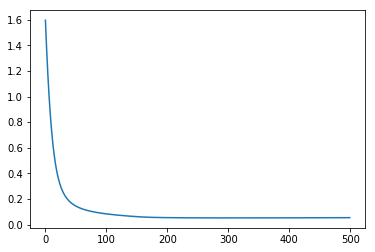

In [34]:
theta=GD(xtrain,ytrain,alpha=0.2,progress=True,iteration=500)

We could see that the cost decreased with each iteration suggesting that our model is working correctly. It stops when the stopping criteria is met, which is 1000 iterations in this case. And finally we can conclude looking at the plot that cost value went down with each iteration. We can further note how the cost drasticallywent  down in the first 100 iterations after which the decrease became negligible.

In [35]:
theta

array([ 1.51977242e-01,  1.49360912e-01,  2.87747478e-01,  1.18627618e-01,
        4.04430536e-02,  1.62290192e-01, -1.22787931e-01, -3.01791496e-01,
        8.41479162e-02, -9.05407926e-02, -1.35578187e-01,  1.32009350e-01,
       -1.65194685e-01, -4.72247566e-03, -1.66982709e-01,  2.93145253e-02,
       -8.36295784e-02, -3.53101119e-02, -1.62826302e-02,  6.12012014e-02,
       -1.70050313e-01,  8.40955915e-02,  9.48762463e-02,  2.18887773e-01,
        3.27014547e-02,  2.63850050e-01,  6.41788888e-02,  5.98004607e-01,
        6.24455515e-01,  6.72034877e-01, -4.85853757e+00])

In [36]:
prediction=hypothesis(theta,xtest)

In [37]:
prediction=(prediction>0.5).astype(int)

## Model performance and comparision 

In [38]:
roc_auc_score(ytest,prediction)

0.798993227259247

In [39]:
accuracy_score(ytest,prediction)

0.9992275552122467

In [40]:
f1_score(ytest,prediction)

0.7349397590361445

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
logr=LogisticRegression()
logr.fit(xtrain,ytrain)
logr_pred=logr.predict(xtest)
roc_auc_score(ytest,logr.predict(xtest))

0.7989756402033201

In [43]:
accuracy_score(ytest,logr_pred)

0.9991924440855307

In [44]:
f1_score(ytest,logr_pred)

0.7261904761904762

In [47]:
ytest.value_counts()

0    56860
1      102
Name: Class, dtype: int64

In [45]:
confusion_matrix(ytest,logr_pred)

array([[56855,     5],
       [   41,    61]], dtype=int64)

In [46]:
confusion_matrix(ytest,prediction)

array([[56857,     3],
       [   41,    61]], dtype=int64)

 # References
- https://stackoverflow.com/questions/38125319/python-divide-by-zero-encountered-in-log-logistic-regression
- https://www.coursera.org/learn/machine-learning/
- https://www.kaggle.com/mlg-ulb/creditcardfraud